In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline

In [2]:
n = 150
cov_nercome = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_nercome_{n}_avg10000.matrix")
cov_sample = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_sample_{n}.matrix")

# 'Real' covariance matrix before processing.
# The term 'real' here indicates that this is the matrix that we use to compare
# our estimates to.
cov_real_preproc = np.loadtxt("../data/C_2048_BOSS_DR12_NGC_z1_V6C_1_1_1_1_1_10_200_200_prerecon.matrix")

In [3]:
print(cov_nercome)
print(cov_sample)

[[ 2.59694937e+08  2.91090103e+07 -1.50569024e+06 ... -1.13871192e+05
  -5.68537943e+04  8.09573650e+04]
 [ 2.91090103e+07  6.56951008e+07  3.67305385e+06 ... -1.89828594e+04
  -3.57755975e+04 -4.71799981e+04]
 [-1.50569024e+06  3.67305385e+06  2.25648277e+07 ...  1.40197732e+04
   5.94126614e+03  2.24141470e+04]
 ...
 [-1.13871192e+05 -1.89828594e+04  1.40197732e+04 ...  1.31973670e+04
   2.08883962e+03  1.29219868e+03]
 [-5.68537943e+04 -3.57755975e+04  5.94126614e+03 ...  2.08883962e+03
   1.22374772e+04  2.04085201e+03]
 [ 8.09573650e+04 -4.71799981e+04  2.24141470e+04 ...  1.29219868e+03
   2.04085201e+03  1.24850089e+04]]
[[ 2.17491934e+08  1.79003573e+07  1.10031168e+07 ...  1.09141317e+05
   1.09107935e+05  3.43871705e+04]
 [ 1.79003573e+07  4.40573547e+07  6.13686621e+06 ...  3.14197442e+04
   3.75987889e+04 -6.14857697e+04]
 [ 1.10031168e+07  6.13686621e+06  2.18446340e+07 ... -1.84484215e+04
   1.56383950e+03  6.08177947e+02]
 ...
 [ 1.09141317e+05  3.14197442e+04 -1.8448421

In [4]:
indices = np.concatenate((np.arange(40), np.arange(40)+80, np.arange(40)+160))
cov_real = (cov_real_preproc[indices, :])[:, indices]

In [5]:
print(cov_real)

[[ 2.39531896e+08  1.91051563e+07  1.44038639e+05 ...  9.68083967e+03
  -1.21684291e+04  2.21567909e+04]
 [ 1.91051563e+07  5.15256710e+07  4.78376836e+06 ...  9.13608077e+03
   9.26311893e+03 -1.41639754e+04]
 [ 1.44038639e+05  4.78376836e+06  1.67772970e+07 ... -5.49127765e+02
  -2.28200815e+03  6.76773412e+03]
 ...
 [ 9.68083967e+03  9.13608077e+03 -5.49127765e+02 ...  4.22979902e+03
   1.28931823e+03  3.78440184e+02]
 [-1.21684291e+04  9.26311893e+03 -2.28200815e+03 ...  1.28931823e+03
   3.88691287e+03  1.00320951e+03]
 [ 2.21567909e+04 -1.41639754e+04  6.76773412e+03 ...  3.78440184e+02
   1.00320951e+03  3.62984716e+03]]


In [6]:
MSE_NERCOME = np.trace((cov_nercome-cov_real)@(cov_nercome-cov_real).T)
MSE_sample = np.trace((cov_sample-cov_real)@(cov_sample-cov_real).T)
print(f"MSE NERCOME: {MSE_NERCOME}")
print(f"MSE sample: {MSE_sample}")

MSE NERCOME: 2.6441688284731456e+16
MSE sample: 3.631667149526651e+16


In [7]:
evals_nercome = np.linalg.eigvalsh(cov_nercome)
evals_sample = np.linalg.eigvalsh(cov_sample)
evals_real = np.linalg.eigvalsh(cov_real)

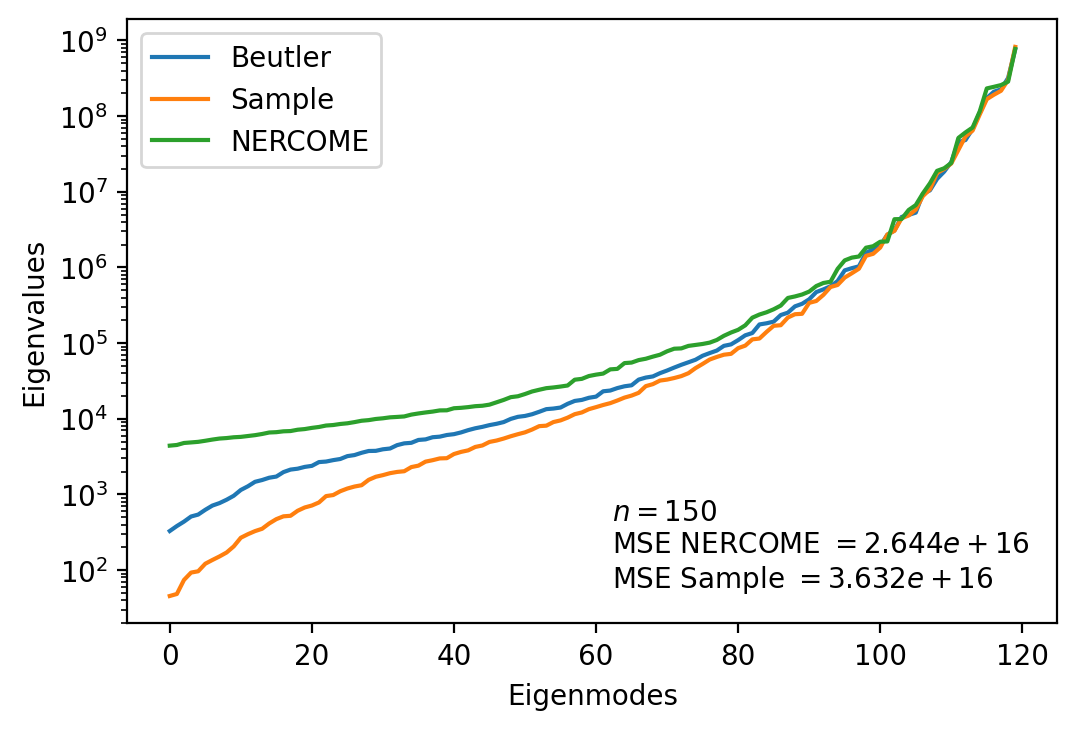

In [8]:
plt.figure(dpi=200)
plt.plot(evals_real, label="Beutler")
plt.plot(evals_sample, label="Sample")
plt.plot(evals_nercome, label="NERCOME")
plt.yscale("log")
plt.legend()
plt.xlabel("Eigenmodes")
plt.ylabel("Eigenvalues")

parameters = AnchoredText(
    fr"$n = {n}$" "\n"
    fr"MSE NERCOME $= {np.format_float_scientific(MSE_NERCOME, precision=3)}$" "\n"
    fr"MSE Sample $={np.format_float_scientific(MSE_sample, precision=3)}$",
    frameon=False, loc="lower right", pad=0.5)
plt.setp(parameters.patch, facecolor='white', alpha=0.5)
plt.gca().add_artist(parameters)

In [9]:
nercome_rel_errors = (cov_nercome-cov_real)/np.abs(cov_real)
print(nercome_rel_errors)

[[  0.08417685   0.52362063 -11.4533773  ... -12.76253262  -3.67223778
    2.65383982]
 [  0.52362063   0.27499748  -0.23218401 ...  -3.07779023  -4.86215462
   -2.33098561]
 [-11.4533773   -0.23218401   0.34496205 ...  26.5309859    3.60352539
    2.31191306]
 ...
 [-12.76253262  -3.07779023  26.5309859  ...   2.12009317   0.62011175
    2.41453877]
 [ -3.67223778  -4.86215462   3.60352539 ...   0.62011175   2.14837961
    1.03432283]
 [  2.65383982  -2.33098561   2.31191306 ...   2.41453877   1.03432283
    2.43954121]]


In [10]:
nercome_pos_count = 0
nercome_neg_count = 0
for row in nercome_rel_errors:
    for error in row:
        if error >= 0:
            nercome_pos_count += 1
        elif error < 0:
            nercome_neg_count += 1

print(f"NERCOME overestimated {nercome_pos_count} elements")
print(f"NERCOME underestimated {nercome_neg_count} elements")

index_max_nercome = np.unravel_index(np.abs(nercome_rel_errors).argmax(), nercome_rel_errors.shape)

print(f"Maximum relative error is {nercome_rel_errors[index_max_nercome]}")
print(f"Maximum relative error index is {index_max_nercome}")
print(f"NERCOME: {cov_nercome[index_max_nercome]}, real: {cov_real[index_max_nercome]}")

NERCOME overestimated 8658 elements
NERCOME underestimated 5742 elements
Maximum relative error is 39176.277199766184
Maximum relative error index is (25, 54)
NERCOME: 1440.6656280781808, real: -0.03677486749440995


In [11]:
sample_rel_errors = (cov_sample-cov_real)/np.abs(cov_real)
print(sample_rel_errors)

[[-9.20126401e-02 -6.30614556e-02  7.53900358e+01 ...  1.02739515e+01
   9.96647663e+00  5.51992370e-01]
 [-6.30614556e-02 -1.44943602e-01  2.82851876e-01 ...  2.43908345e+00
   3.05897724e+00 -3.34099666e+00]
 [ 7.53900358e+01  2.82851876e-01  3.02035366e-01 ... -3.25958636e+01
   1.68529094e+00 -9.10135662e-01]
 ...
 [ 1.02739515e+01  2.43908345e+00 -3.25958636e+01 ...  3.75681027e-02
   5.95495972e-01 -9.17076717e-01]
 [ 9.96647663e+00  3.05897724e+00  1.68529094e+00 ...  5.95495972e-01
  -2.95814343e-02 -3.96561634e-01]
 [ 5.51992370e-01 -3.34099666e+00 -9.10135662e-01 ... -9.17076717e-01
  -3.96561634e-01 -1.15159347e-01]]


In [12]:
sample_pos_count = 0
sample_neg_count = 0
for row in sample_rel_errors:
    for error in row:
        if error >= 0:
            sample_pos_count += 1
        elif error < 0:
            sample_neg_count += 1

print(f"Sample overestimated {sample_pos_count} elements")
print(f"Sample underestimated {sample_neg_count} elements")

index_max_sample = np.unravel_index(np.abs(sample_rel_errors).argmax(), sample_rel_errors.shape)

print(f"Maximum relative error is {sample_rel_errors[index_max_sample]}")
print(f"Maximum relative error index is {index_max_sample}")
print(f"Sample: {cov_sample[index_max_sample]}, real: {cov_real[index_max_sample]}")

Sample overestimated 6458 elements
Sample underestimated 7942 elements
Maximum relative error is 20976.259187422744
Maximum relative error index is (80, 94)
Sample: 279295.68220528605, real: -13.315481811674502
